# INTRODUCTION

**Instagram Data Analysis**

The data in this notebook is about instagram posts. It has the following columns:

1. User uuid: user ID of the account which has posted the image or video.
2. Likes: The number of likes on the particular post till the time data was collected.
3. Days passed from post: Number of days passed since the post was done.
4. Likes Score: This attribute is ambiguous and will be analysed during analysis.
5. Type: The type of post - Image/Video
6. Numer of Tags: Number of users tagged.
6. Numer of Comments: No. of comments on the post.
7. Date Posted: The date when the post was done.
8. Year: Year of the post.
9. Month: Month of the post.
10. Day: Day of the month when post was done.
11. Hour: Hour at which post was done.
12. Minute: Minute at which post was done.

# *Exploratory Data Analysis*

In [233]:
#importing libraries for working with dataframe
import numpy as np
import pandas as pd
import math
#importing libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [234]:
data = pd.read_csv('1100dataset.csv')
data.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51


Checking Dimensions...


In [235]:
data.shape

(178922, 13)

In [236]:
data['Type'].unique()
data['Type'].replace('Images','Image', inplace = True)
data.isnull().sum() #counting the number of null values in the dataset

User uuid                0
Likes                    0
Days passed from post    0
Likes Score              0
Type                     0
Numer of Tags            0
Numer of Comments        0
Date Posted              0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64

1 -> Exploring UUID - Key Feature


In [237]:
print(data['User uuid'].nunique())
print(data['User uuid'].describe())#Thus we can see we have data of 1089 users with each having a unique uuid.
freq_id = data['User uuid'].value_counts().sort_index(ascending=True) #storing the post freq of each user id into a new variable
plt.figure(figsize=(250,60))
plt.title("No. of posts per user")
plt.xlabel('UUID Number')
plt.ylabel('No. of posts')
plt.xticks(rotation=90)
plt.ylim(0,210)
freq_id[0::].plot.bar(color=np.random.rand(10,3))

1089
count    178922.000000
mean        546.316948
std         317.200142
min           1.000000
25%         273.000000
50%         540.000000
75%         829.000000
max        1089.000000
Name: User uuid, dtype: float64


<AxesSubplot:title={'center':'No. of posts per user'}, xlabel='UUID Number', ylabel='No. of posts'>

2 -> Exploring Likes column and establishing a relationship heatmap between likes and number of posts...


[[1.         0.04541411]
 [0.04541411 1.        ]]


<AxesSubplot:>

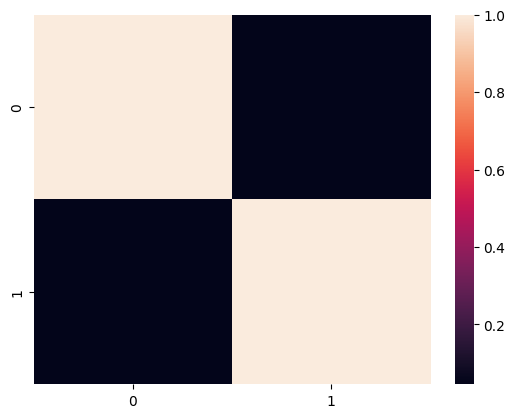

In [238]:
lc = (data.groupby('User uuid')['Likes'].sum())/(data['User uuid'].value_counts().sort_index(ascending=True)) #finding average no of likes per user
x = data['User uuid'].value_counts().sort_index(ascending=True) #each index has no of posts corresponding to that user
y = lc.values #average likes according to no of posts
ans=np.corrcoef(x,y)
print(ans)
sns.heatmap(ans) 
#Thus we can see there is no apparent correlation between the no of posts and the likes the user gets.

3 -> Exploring Days since posted vs likes on a post...


0 3775
2913


2812434.0

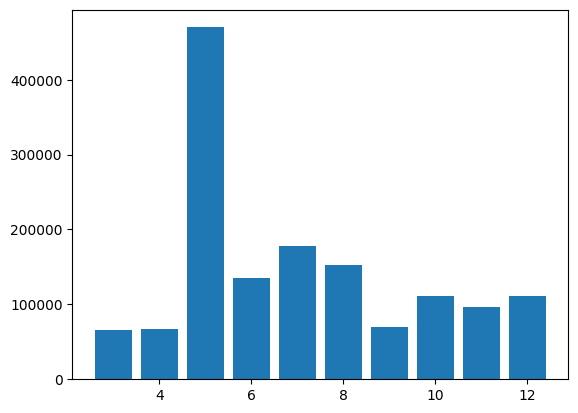

In [239]:
dp = data['Days passed from post']
print(dp.min(), dp.max())
print(dp.nunique())
data_r = data[data['Likes']>=data['Likes'].mean()]
data_r
vc = data_r['Days passed from post'].value_counts().sort_index(ascending=True)
abc = data_r.groupby('Days passed from post')['Likes'].sum()/vc
plt.bar(abc.index[:10], abc.values[:10])
abc.values.max()
#Likes spike up most approximately within 6 days of content posted, for posts whose likes are above the mean

4 -> Exploring Likes Score and comparing to previous observations...

95        0.171742
135       0.151343
139       0.172392
170       0.176698
171       0.188880
            ...   
178614    0.810688
178617    0.839832
178626    0.870588
178637    0.968813
178842    0.814865
Length: 4194, dtype: float64

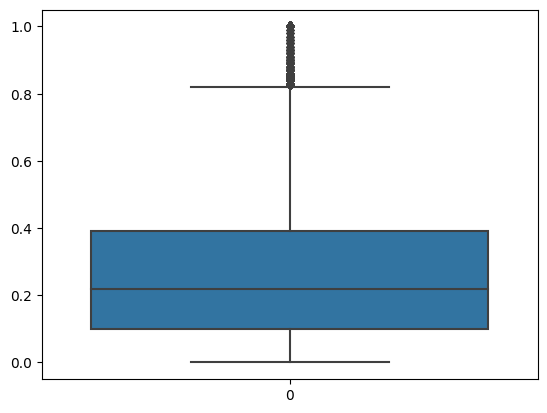

In [240]:
sns.boxplot(data['Likes Score'])
d = data[data['Likes Score']>0.8] # more than the mean
d['Likes Score']-(d['Likes']/d['Days passed from post'])



0        -0.030167
1        -0.015997
2        -0.010060
3        -0.007766
4        -0.011128
            ...   
178917    0.059038
178918    0.016350
178919    0.007567
178920    0.082968
178921    0.059064
Length: 174409, dtype: float64

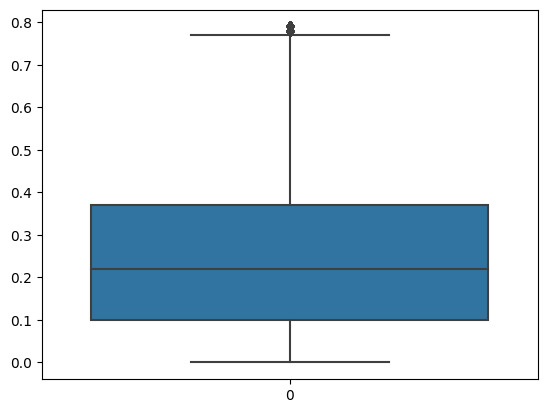

In [241]:
d2 = data[data['Likes Score']<0.8] # less than the mean
sns.boxplot(d2['Likes Score'])
ss = d2['Likes Score']-(d2['Likes']/d2['Days passed from post']) 
ss

### Thus, like score is approximately the likes/days passed

5 -> Comparing video reach vs photo reach...

In [242]:
data_r.groupby('Type')['Likes'].sum()/data_r['Type'].value_counts().sort_index(ascending=True)


Type
Image    350353.582533
Video    209176.763097
dtype: float64

### It is quite evident that the likes average for image type is greater than video type. Images have a better reach than videos.

6 -> Comparing number of hashtags to number of likes...

count    178922.000000
mean          3.578045
std           6.877008
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          31.000000
Name: Numer of Tags, dtype: float64


<AxesSubplot:>

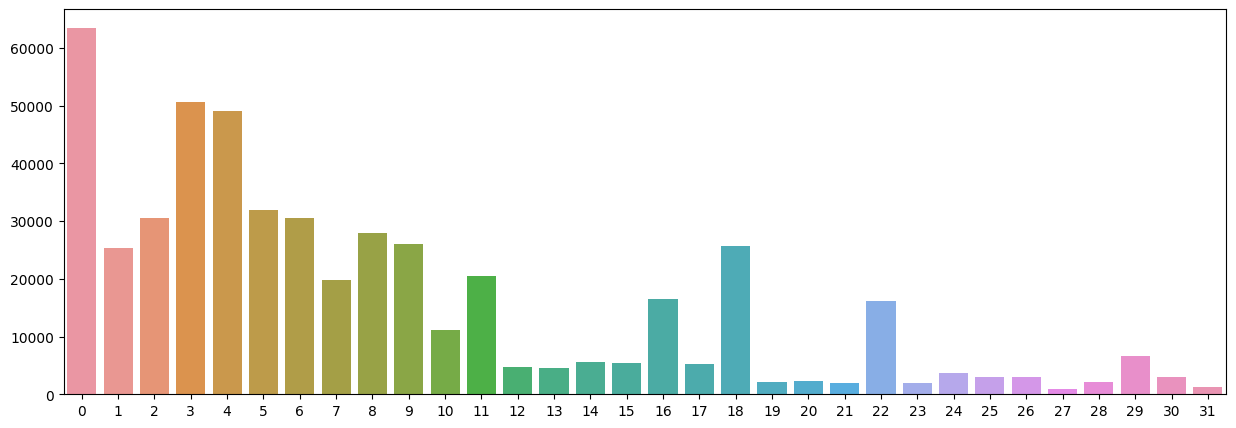

In [243]:
print(data['Numer of Tags'].describe()) # Numer is a typo in the dataset
plt.figure(figsize=(15,5))
sns.barplot(x=data['Numer of Tags'].unique(),y=data.groupby('Numer of Tags')['Likes'].sum()/data['Numer of Tags'].value_counts().sort_index(ascending=True))

<AxesSubplot:xlabel='Numer of Tags', ylabel='count'>

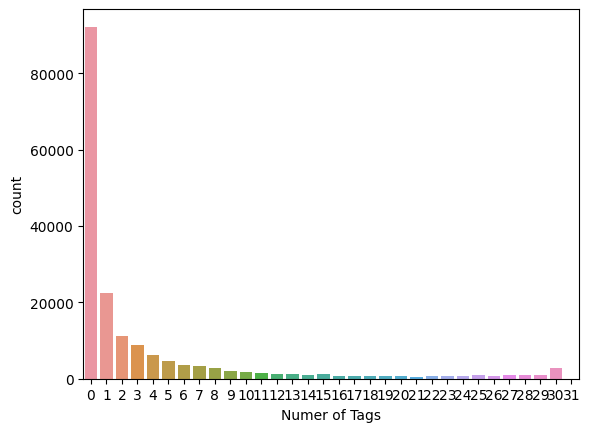

In [244]:
sns.countplot(x=data['Numer of Tags'])

7 -> Comparing number of comments to likes...

count    1.789220e+05
mean     5.622285e+02
std      1.201380e+04
min      0.000000e+00
25%      4.000000e+00
50%      2.300000e+01
75%      1.357500e+02
max      2.907644e+06
Name: Numer of Comments, dtype: float64


<AxesSubplot:>

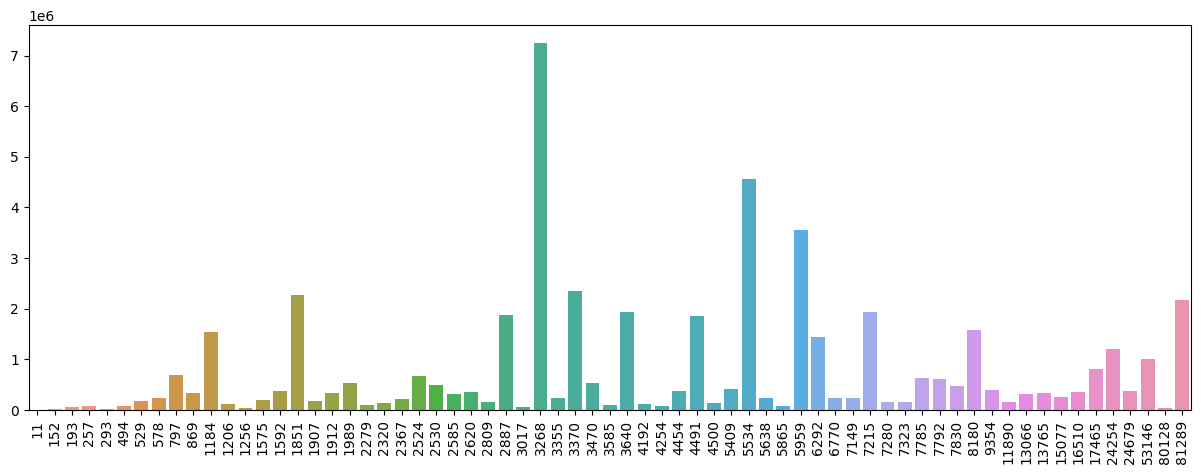

In [245]:
print(data['Numer of Comments'].describe())
plt.figure(figsize=(15,5))
x=data['Numer of Comments'].unique()[::100]
y=(data.groupby('Numer of Comments')['Likes'].sum()/data['Numer of Comments'].value_counts(ascending=False).sort_index(ascending=True))[::100]
plt.xticks(rotation = 90)
sns.barplot(x=x,y=y)

8-> Comparing time posted (Which hour of the day) to likes...

<AxesSubplot:>

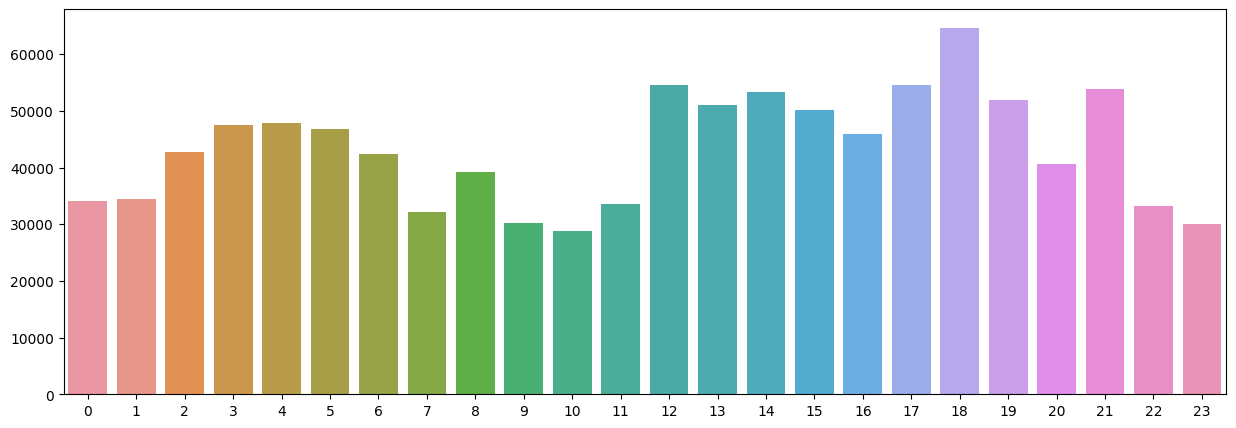

In [246]:
plt.figure(figsize=(15,5))
sns.barplot(x=data['Hour'].unique(),y=data.groupby('Hour')['Likes'].sum()/data['Hour'].value_counts().sort_index(ascending=True))

From the bar graph above, 18:00 has the highest.

9 -> Historical analysis, to see which recent year posts performed the best in...

2010        1
2011        9
2012       78
2013      557
2014     1017
2015     2378
2016     4558
2017     9107
2018    15524
2019    29898
2020    91877
2021    23918
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

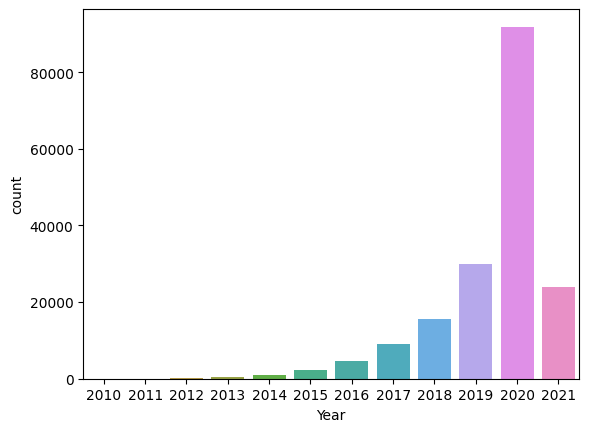

In [247]:
data['Year'].nunique()
print(data.Year.value_counts().sort_index(ascending=True))
sns.countplot(x=data['Year'])



10 -> Which Month did posts perform the best?

<AxesSubplot:>

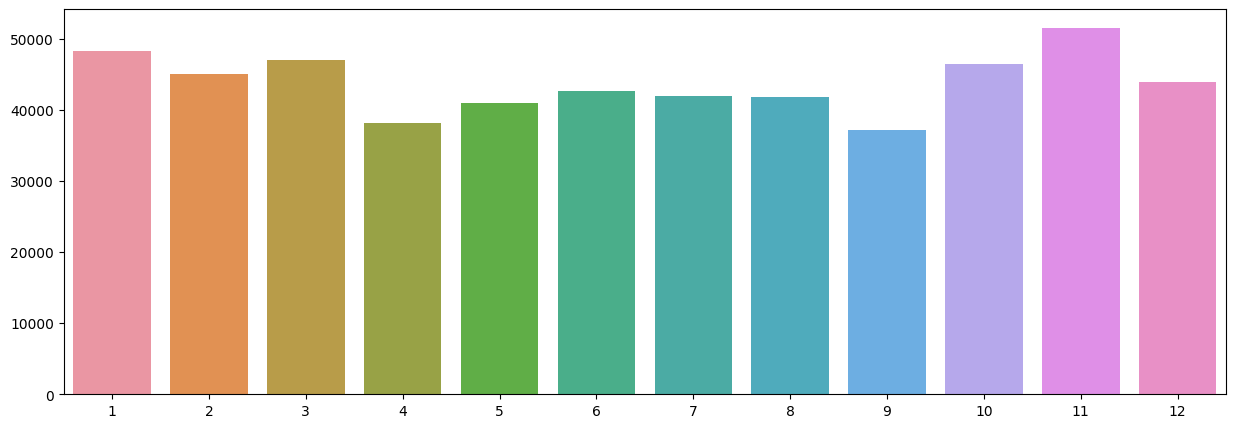

In [248]:
plt.figure(figsize=(15,5))
sns.barplot(x=data['Month'].unique(),y=data.groupby('Month')['Likes'].sum()/data['Month'].value_counts().sort_index(ascending=True))

It is also not evident which month is the best from the above bar graph.

11 -> To figure out if the day of the week has an impact, we added a new column.

In [249]:
data['Date Posted'] = pd.to_datetime(data['Date Posted'])

# add a new column with the day of the week
data['day_of_week'] = data['Date Posted'].dt.day_name()
data.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute,day_of_week
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18,Sunday
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25,Sunday
2,1,373,666,0.55,Image,4,15,2019-05-03 15:18:37,2019,5,3,15,18,Friday
3,1,312,667,0.46,Image,4,1,2019-05-02 16:40:38,2019,5,2,16,40,Thursday
4,1,513,674,0.75,Image,5,0,2019-04-25 16:51:58,2019,4,25,16,51,Thursday


<AxesSubplot:>

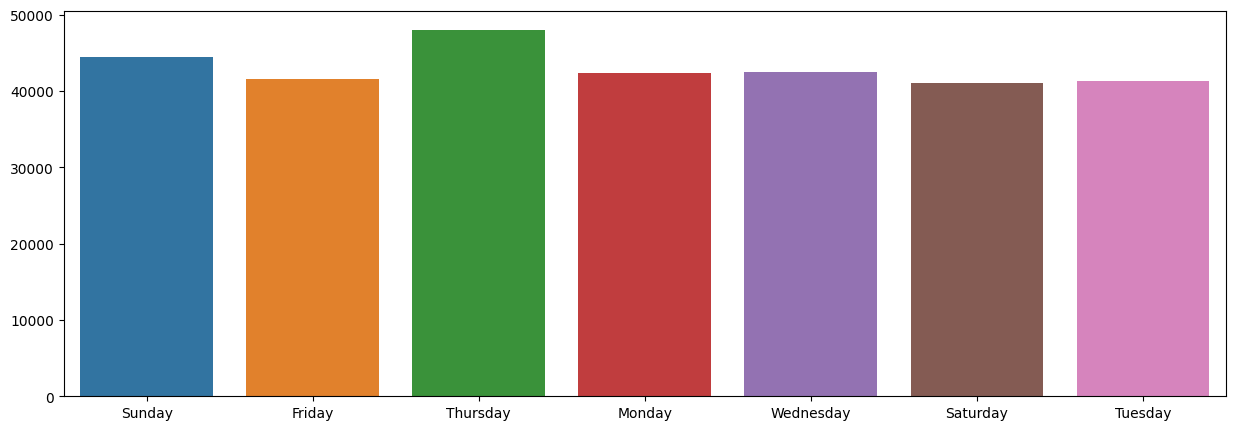

In [250]:
plt.figure(figsize=(15,5))
sns.barplot(x=data['day_of_week'].unique(),y=data.groupby('day_of_week')['Likes'].sum()/data['day_of_week'].value_counts().sort_index(ascending=True))

Similar to the other factors, it does not seem obvious whether there is a difference between the days.

In [251]:
from sklearn.metrics import r2_score, mean_squared_error


Interesting factors from Exploratory Analysis: Image/Video, Number of hashtags, Hour Posted, Month posted, Day of the week posted

Response Variable: Number of likes

Predictors Featured: Number of hashtags, Hour Posted, Month posted, Day of the week posted

In [252]:
data.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute,day_of_week
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18,Sunday
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25,Sunday
2,1,373,666,0.55,Image,4,15,2019-05-03 15:18:37,2019,5,3,15,18,Friday
3,1,312,667,0.46,Image,4,1,2019-05-02 16:40:38,2019,5,2,16,40,Thursday
4,1,513,674,0.75,Image,5,0,2019-04-25 16:51:58,2019,4,25,16,51,Thursday


In [253]:
def findxmax(model, xmax):
    dmodel = model.deriv()
    crit_points = dmodel.roots
    ymax = -float('inf')
    for x in crit_points:
        if x <= xmax:
            y = model(x)
            if y > ymax:
                xmax = round(x)
                ymax = round(y)
    print("It occurs at x =", xmax)

    

In each section of polynomial regression, we have decided on a value of polynomial degree n by testing the models to maximise the R^2 score whilst not overfitting the model. This is done when we can no longer see a significant increase in R^2 score and that the polynomial model line has no significant changes.

1 -> Polynomial regression of Likes against Hour posted

In [254]:
HourLikes=data.groupby('Hour')['Likes'].mean().reset_index(name="Likes")

1a -> When regression is linear, the R^2 score is very low at 0.15

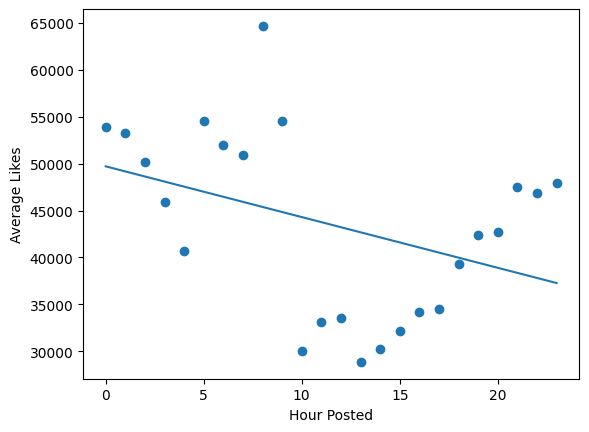

 
-540.9 x + 4.972e+04
0.15154500865638298
RMSE: 8859.0
It occurs at x = 23


In [255]:
model = np.poly1d(np.polyfit(HourLikes['Hour'],HourLikes['Likes'], 1))

polyline = np.linspace(0, 23)
plt.scatter(HourLikes['Hour'], HourLikes['Likes'])
plt.plot(polyline, model(polyline))
plt.xlabel('Hour Posted')
plt.ylabel('Average Likes')
plt.show()
  
print(model)

print(r2_score(HourLikes['Likes'], model(HourLikes['Hour'])))
rmse = mean_squared_error(HourLikes['Likes'], model(HourLikes['Hour']),squared=False)
print('RMSE:', np.round(rmse))
findxmax(model,23)

1b -> When the degree is 2, the R^2 score increases but is still low at 0.36

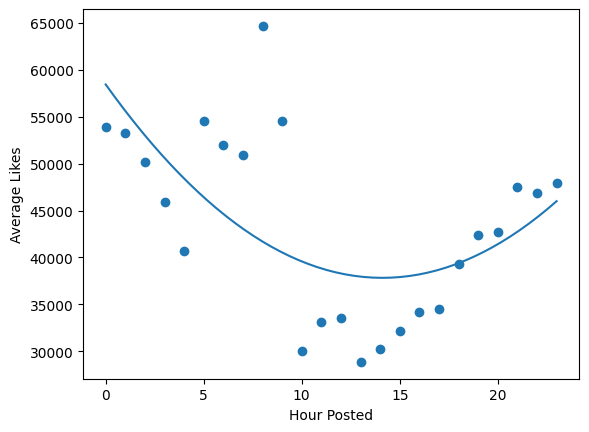

       2
103.5 x - 2921 x + 5.844e+04
0.36315014631970455
RMSE: 7675.0
It occurs at x = 14


In [256]:
model = np.poly1d(np.polyfit(HourLikes['Hour'],HourLikes['Likes'], 2))

polyline = np.linspace(0, 23)
plt.scatter(HourLikes['Hour'], HourLikes['Likes'])
plt.plot(polyline, model(polyline))
plt.xlabel('Hour Posted')
plt.ylabel('Average Likes')
plt.show()
  
print(model)

print(r2_score(HourLikes['Likes'], model(HourLikes['Hour'])))
rmse = mean_squared_error(HourLikes['Likes'], model(HourLikes['Hour']),squared=False)
print('RMSE:', np.round(rmse))
findxmax(model,23)

1c -> When the degree is 3, the R^2 score increases to 0.51 and the points seem to fit a lot better

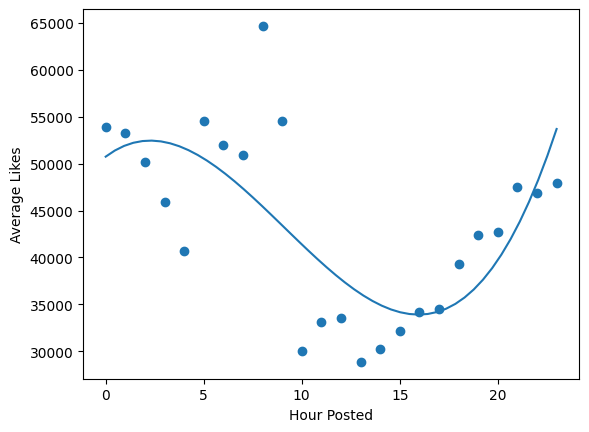

       3         2
14.48 x - 396.1 x + 1578 x + 5.075e+04
0.5141530616033814
RMSE: 6703.0
It occurs at x = 2


In [257]:
model = np.poly1d(np.polyfit(HourLikes['Hour'],HourLikes['Likes'], 3))
hourmodel=model

polyline = np.linspace(0, 23)
plt.scatter(HourLikes['Hour'], HourLikes['Likes'])
plt.plot(polyline, model(polyline))
plt.xlabel('Hour Posted')
plt.ylabel('Average Likes')
plt.show()
  
print(model)

print(r2_score(HourLikes['Likes'], model(HourLikes['Hour'])))
rmse = mean_squared_error(HourLikes['Likes'], model(HourLikes['Hour']),squared=False)
print('RMSE:', np.round(rmse))
findxmax(model,23)

1d -> When the degree is 4, the R^2 score increases very slightly and MSE decreases very slightly and the points do not seem to fit any better than degree = 3, hence we would use the model at degree = 3 instead.

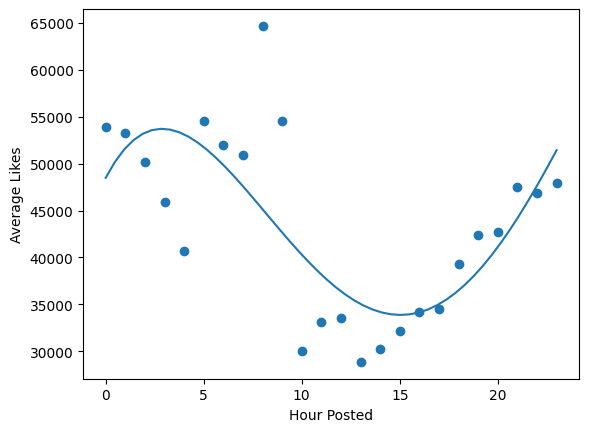

        4         3         2
-0.743 x + 48.66 x - 894.7 x + 4005 x + 4.849e+04
0.5282878315432294
RMSE: 6605.0
It occurs at x = 3


In [258]:
model = np.poly1d(np.polyfit(HourLikes['Hour'],HourLikes['Likes'], 4))

polyline = np.linspace(0, 23)
plt.scatter(HourLikes['Hour'], HourLikes['Likes'])
plt.plot(polyline, model(polyline))
plt.xlabel('Hour Posted')
plt.ylabel('Average Likes')
plt.show()

print(model)

print(r2_score(HourLikes['Likes'], model(HourLikes['Hour'])))
rmse = mean_squared_error(HourLikes['Likes'], model(HourLikes['Hour']),squared=False)
print('RMSE:', np.round(rmse))
findxmax(model,23)

We have done the same process for the next few factors, so we would be skipping the behind-the-scenes part of determining the best degree.

2 -> Polynomial regression of Likes against Number of Hashtags posted

In [259]:
TagsLikes=data.groupby('Numer of Tags')['Likes'].mean().reset_index(name="Likes")

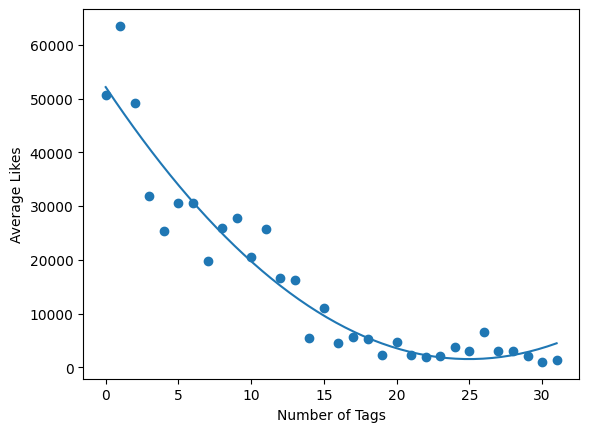

       2
81.08 x - 4051 x + 5.212e+04
0.9081994537570807
RMSE: 4921.0
It occurs at x = 0


In [260]:
model = np.poly1d(np.polyfit(TagsLikes['Numer of Tags'],TagsLikes['Likes'], 2))
  
# polynomial line visualization
polyline = np.linspace(0, 31)
plt.scatter(TagsLikes['Numer of Tags'], TagsLikes['Likes'])
plt.plot(polyline, model(polyline))
plt.xlabel('Number of Tags')
plt.ylabel('Average Likes')
plt.show()
  
print(model)
  
# r square metric
print(r2_score(TagsLikes['Likes'], model(TagsLikes['Numer of Tags'])))
rmse = mean_squared_error(TagsLikes['Likes'], model(TagsLikes['Numer of Tags']),squared=False)
print('RMSE:', np.round(rmse))
print("It occurs at x = 0")




2a -> In this case, we would use polynomial degree = 3 instead of 2 as the model of degree = 2 would curve upwards after Number of Tags = 25

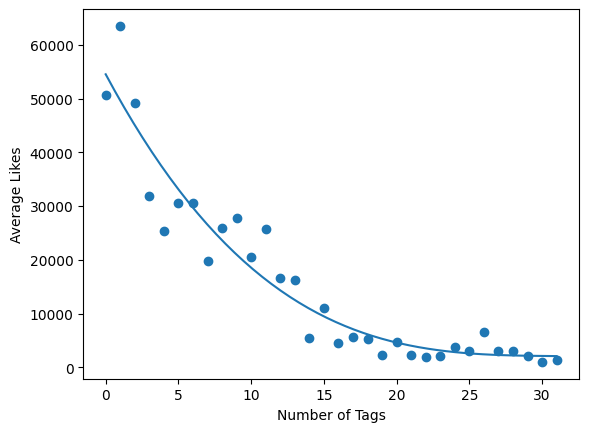

        3         2
-1.767 x + 163.2 x - 5053 x + 5.45e+04
0.9126759941044964
RMSE: 4800.0
It occurs at x = 0


In [261]:
model = np.poly1d(np.polyfit(TagsLikes['Numer of Tags'],TagsLikes['Likes'], 3))
tagsmodel=model
# polynomial line visualization
polyline = np.linspace(0, 31)
plt.scatter(TagsLikes['Numer of Tags'], TagsLikes['Likes'])
plt.plot(polyline, model(polyline))
plt.xlabel('Number of Tags')
plt.ylabel('Average Likes')
plt.show()
  
print(model)
  
# r square metric
print(r2_score(TagsLikes['Likes'], model(TagsLikes['Numer of Tags'])))
rmse = mean_squared_error(TagsLikes['Likes'], model(TagsLikes['Numer of Tags']),squared=False)
print('RMSE:', np.round(rmse))
print("It occurs at x = 0")

2b -> However we can see that there is an outlier when Number of Tags = 1, while the rest of the points seem to fit the curve. Thus it may seem that the model is suitable in predicting a larger number of hashtags but not when Tags = 1. Using Cook's distance, we determined that Tags = 1 is indeed an outlier in the model.

In [262]:
import statsmodels.api as sm

# fit the polynomial regression model
model = np.poly1d(np.polyfit(TagsLikes['Numer of Tags'], TagsLikes['Likes'], 3))

# calculate residuals and leverage values using the OLS model
X = TagsLikes['Numer of Tags']
y = TagsLikes['Likes']
X = sm.add_constant(X)
res = sm.OLS(y, X).fit().resid
lev = sm.OLS(y, X).fit().get_influence().hat_matrix_diag

# calculate Cook's distance
cd = (res**2 / (3 * np.mean(res**2))) * lev / (1 - lev)**2

# find potential outliers based on Cook's distance
outliers = np.where(cd > 4 / (len(y) - 4 - 1))

# print the outliers
if outliers[0].size > 0:
    print(f"Potential outliers: {outliers[0]}")
else:
    print("No potential outliers")


Potential outliers: [1]


3 -> Polynomial regression of Likes against Month posted

In [263]:
MonthLikes=data.groupby('Month')['Likes'].mean().reset_index(name="Likes")

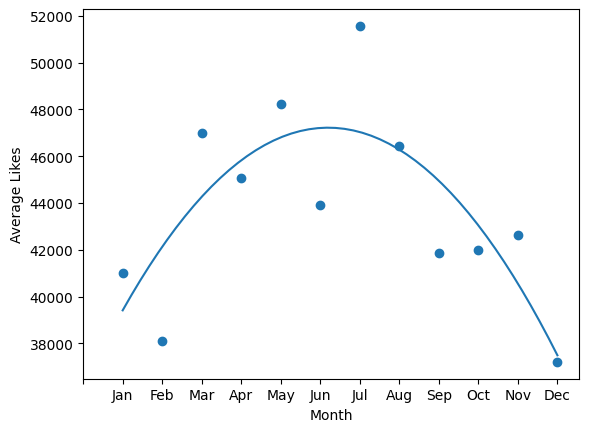

      2
-289 x + 3582 x + 3.612e+04
0.6073499267903291
RMSE: 2498.0
It occurs at x = 6


In [264]:
model = np.poly1d(np.polyfit(MonthLikes['Month'],MonthLikes['Likes'], 2))
monthmodel=model
# polynomial line visualization
polyline = np.linspace(1, 12)
plt.scatter(MonthLikes['Month'], MonthLikes['Likes'])
plt.plot(polyline, model(polyline))
plt.xticks(range(13), ['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.show()
  
print(model)
  
# r square metric
print(r2_score(MonthLikes['Likes'], model(MonthLikes['Month'])))
rmse = mean_squared_error(MonthLikes['Likes'], model(MonthLikes['Month']),squared=False)
print('RMSE:', np.round(rmse))

findxmax(model,12)


3a -> x=6 means that Jun is the max value of likes obtained.

4 -> Polynomial regression of Likes against Day of the Week posted

In [265]:
data['day_of_weekINT'] = data['Date Posted'].dt.weekday
data.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute,day_of_week,day_of_weekINT
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18,Sunday,6
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25,Sunday,6
2,1,373,666,0.55,Image,4,15,2019-05-03 15:18:37,2019,5,3,15,18,Friday,4
3,1,312,667,0.46,Image,4,1,2019-05-02 16:40:38,2019,5,2,16,40,Thursday,3
4,1,513,674,0.75,Image,5,0,2019-04-25 16:51:58,2019,4,25,16,51,Thursday,3


In [266]:
DayLikes=data.groupby('day_of_weekINT')['Likes'].mean().reset_index(name="Likes")

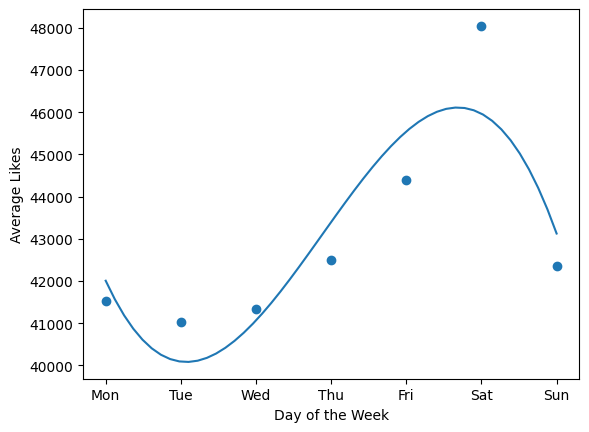

        3        2
-256.5 x + 2216 x - 3877 x + 4.201e+04
0.7766353333405713
RMSE: 1085.0
It occurs at x = 5


In [267]:
model = np.poly1d(np.polyfit(DayLikes['day_of_weekINT'],DayLikes['Likes'], 3))
daymodel=model
# polynomial line visualization
polyline = np.linspace(0, 6)
plt.scatter(DayLikes['day_of_weekINT'], DayLikes['Likes'])
plt.plot(polyline, model(polyline))
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.show()
  
print(model)
  
# r square metric
print(r2_score(DayLikes['Likes'], model(DayLikes['day_of_weekINT'])))
rmse = mean_squared_error(DayLikes['Likes'], model(DayLikes['day_of_weekINT']),squared=False)
print('RMSE:', np.round(rmse))

findxmax(model,6)


4a -> x = 5 means that Saturday is the max value of likes obtained.

5 -> Using the individual models. we have determined the best metrics to obtain the highest reach in an Instagram post:

Type of post: Image

Time to post: 3 AM (GMT +3 as data is scraped by a Greek user)

Number of Hashtags: 0 or 1 (1 is an outlier in regression analysis)

Best Month to post: June

Best Day to post: Saturdays

6-> However, the above polynomial regression is only done on the individual means grouped by the datapoints of each individual variable (e.g. mean of Hour = 0 to 23 and so on). Furthermore, the data is also not trained on the big amount of data we have with 178922 data points. We would be determining the optimal weights using scipy's minimize function, by using MSE as a metric to minimize.

In [268]:
from scipy.optimize import minimize

from sklearn.model_selection import train_test_split

X = data[['Hour', 'Month', 'Numer of Tags', 'day_of_weekINT']]
y = data['Likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=49)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=49)
#random_state=49 just for testing, to make sure we run same output every time
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

def objective(weights):
    hour_likes = hourmodel(val_data['Hour'])
    month_likes = monthmodel(val_data['Month'])
    hashtag_likes = tagsmodel(val_data['Numer of Tags'])
    day_likes = daymodel(val_data['day_of_weekINT'])
    ensemble_likes = np.average([hour_likes, month_likes, hashtag_likes, day_likes], axis=0, weights=weights)
    return mean_squared_error(val_data['Likes'], ensemble_likes)

#Initialize weights and learning rate
weights = np.array([0.25, 0.25, 0.25, 0.25])
lr = 0.0001

for i in range(100):
    grad = minimize(objective, weights, method='BFGS').jac
    weights -= lr * grad
    weights /= np.sum(weights)  # make sure weights sum to 1
    weights = np.abs(weights) / np.sum(np.abs(weights)) # normalize the weights

hour_likes = hourmodel(test_data['Hour'])
month_likes = monthmodel(test_data['Month'])
hashtag_likes = tagsmodel(test_data['Numer of Tags'])
day_likes = daymodel(test_data['day_of_weekINT'])
ensemble_likes = np.average([hour_likes, month_likes, hashtag_likes, day_likes], axis=0, weights=weights)
ensemble_mse = mean_squared_error(test_data['Likes'], ensemble_likes)
print("RMSE =",np.round(np.sqrt(ensemble_mse)))
print("Initial dataset standard deviation = ",np.round(data['Likes'].std()))
#RMSE is around sd (in other words MSE is around var) but to check whether model can be used we should also see max and min of the data
#Considering the noise of the dataset from 178922 datapoints and the maxes and mins, the RMSE obtained should be decently ok.
print("Weights of each model ~ Hour:",weights[0], ", Month:",weights[1],", Number of Tags:",weights[2],", Day:",weights[3] )


RMSE = 259217.0
Initial dataset standard deviation =  260465.0
Weights of each model ~ Hour: 0.4234417344173442 , Month: 0.0765582655826558 , Number of Tags: 0.4234417344173442 , Day: 0.0765582655826558


In [269]:
print("Max of the data is ",np.round(data["Likes"].max())," and the min is ",np.round(data["Likes"].min()))

Max of the data is  15445692  and the min is  0


6b-> We can then try inputting our individual model's best metrics into our ensemble model.

In [270]:
#example of prediction using individual model's maximums
hours = 3
month = 6
num_tags = 0
day = 5

hour_likes = hourmodel(hours)
month_likes = monthmodel(month)
hashtag_likes = tagsmodel(num_tags)
day_likes = daymodel(day)
predicted_likes = np.average([hour_likes, month_likes, hashtag_likes, day_likes], axis=0, weights=weights)
print(predicted_likes)


52362.90927809911


6c-> Then we determined the best possible combination of metrics in the ensemble model prediction.

In [271]:
import itertools

hours = list(range(0, 23))
months = list(range(1, 12))
num_tags = list(range(0, 31))
days = list(range(0, 6))

best_combination = None
best_like_count = float('-inf')

for combination in itertools.product(hours, months, num_tags, days):
    hour_likes = hourmodel(combination[0])
    month_likes = monthmodel(combination[1])
    hashtag_likes = tagsmodel(combination[2])
    day_likes = daymodel(combination[3])
    ensemble_likes = np.average([hour_likes, month_likes, hashtag_likes, day_likes], axis=0, weights=weights)
    
    if ensemble_likes > best_like_count:
        best_combination = combination
        best_like_count = ensemble_likes
        
print("Best combination ~ Hour:",best_combination[0], ", Month:",best_combination[1],", Number of Tags:",best_combination[2],", Day:",best_combination[3] )
print("Best combination like count:", best_like_count)


Best combination ~ Hour: 2 , Month: 6 , Number of Tags: 0 , Day: 5
Best combination like count: 52416.83101922793


We have then arrived at the same conclusion as our individual NumPy polynomial models, with only hour differing where the ensemble model suggests 2 but the NumPy model suggesting 3